<a href="https://colab.research.google.com/github/opeokupe/capstone-ai-ml/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Churn Rate Analysis & Data Preprocessing

## Imperial College Capstone Project


In [2]:
# 1. Initial Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

# Load the data
train_url = 'https://raw.githubusercontent.com/opeokupe/capstone-ai-ml/main/data/train.csv'
test_url = 'https://raw.githubusercontent.com/opeokupe/capstone-ai-ml/main/data/test.csv'
train_data = pd.read_csv(train_url, on_bad_lines='skip')
test_data = pd.read_csv(test_url, on_bad_lines='skip' )

# 2. Initial Data Exploration
## 2.1 Basic Data Overview

In [2]:


def explore_data(df, title="Dataset"):
    """
    Performs initial exploration of the dataset
    """
    print(f"\n{title} Exploration:")
    print("-" * 50)
    print(f"Shape: {df.shape}")
    print("\nFirst few rows:")
    print(df.head())
    print("\nData Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nBasic Statistics:")
    print(df.describe())



### Explore training data

In [12]:

explore_data(train_data, "Training Dataset")


Training Dataset Exploration:
--------------------------------------------------
Shape: (36992, 25)

First few rows:
                            customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  .


## 2.2 Data Distribution Analysis

Analyzes and plots distributions of numerical features

In [14]:


def analyze_distributions(df):
    """
    Analyzes and plots distributions of numerical features
    :param df: DataFrame
    """
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    plt.figure(figsize=(15, len(numerical_cols)*4))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(len(numerical_cols), 2, i*2-1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')

        plt.subplot(len(numerical_cols), 2, i*2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()



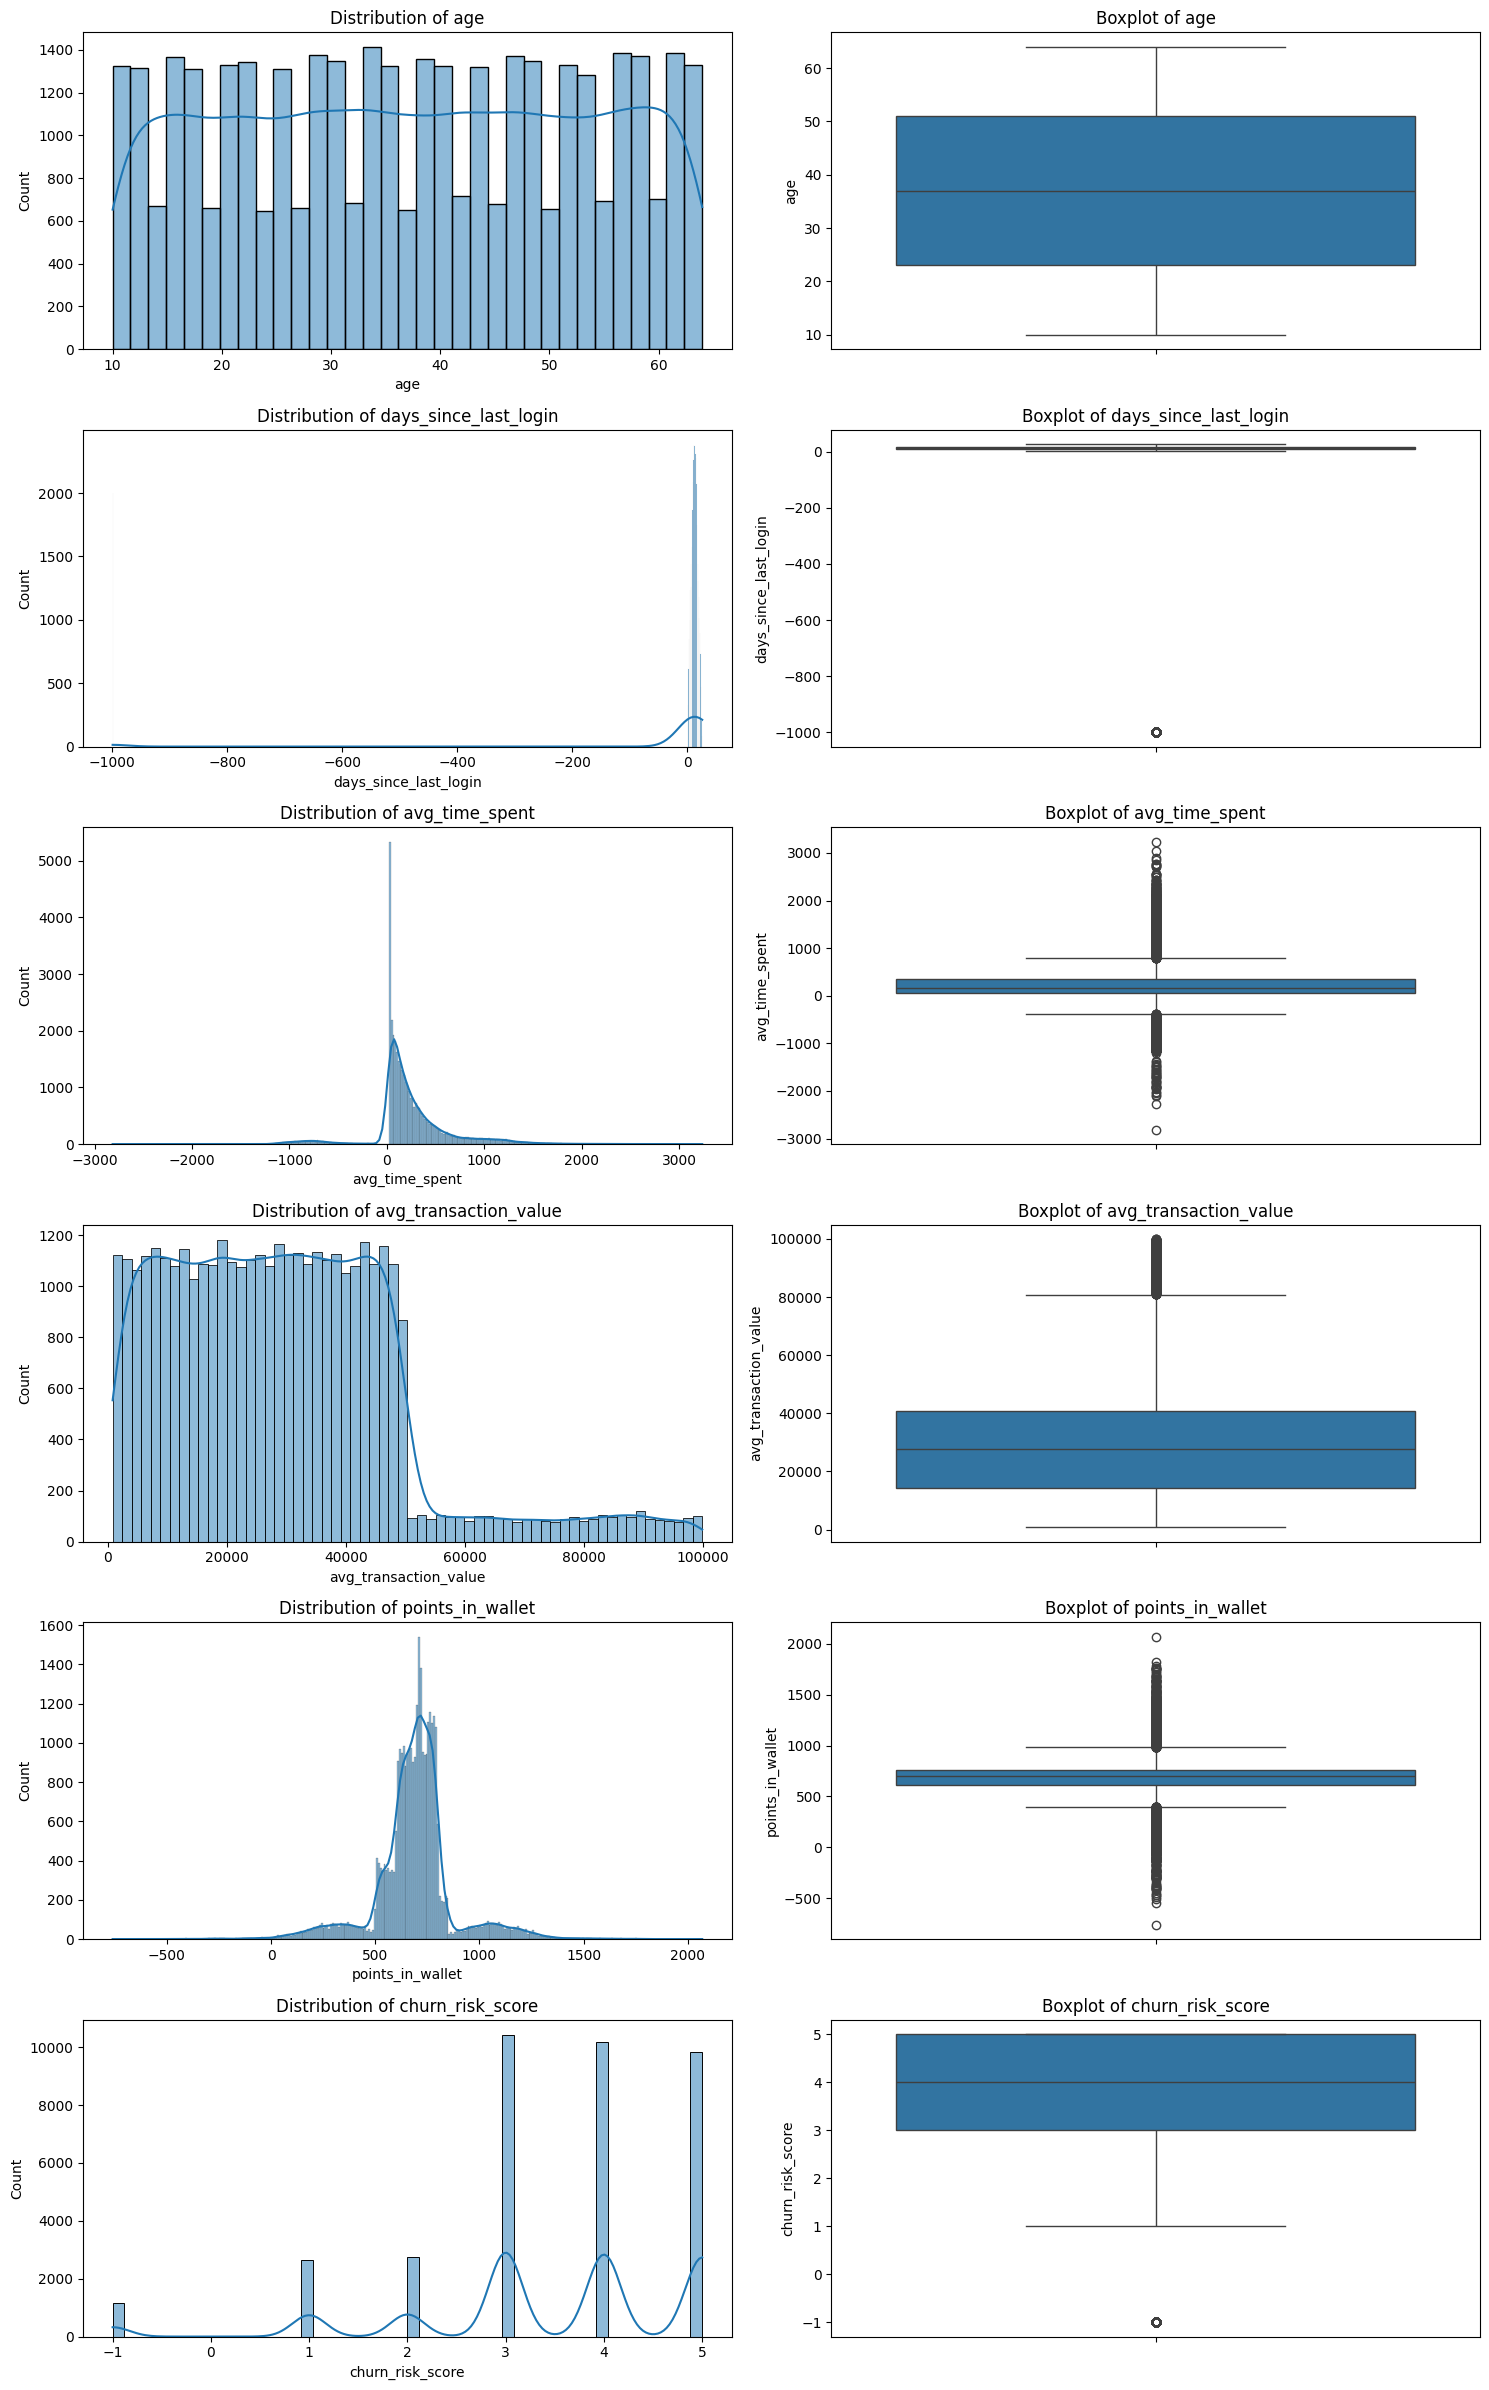

In [15]:

# Plot distributions
analyze_distributions(train_data)

# 3. Bias Analysis

Document potential biases in the dataset:
- Selection bias: [Your analysis here]
- Measurement bias: [Your analysis here]
- Demographic representation: [Your analysis here]
- Time-related biases: [Your analysis here]


### Initial Assessment of the Dataset

Here are some key observations and potential biases:



### **1. Selection Bias**
- **Possible Issues**:
  - The column `region_category` indicates whether customers are from "Village," "City," or "Town." Missing values (`5428` out of `36992`) could mean certain regions are underrepresented, potentially skewing analysis.
  - If the dataset only includes customers with memberships (`membership_category`), non-members may be excluded, biasing insights.

- **My Potential Solution**:
  - Assess the proportion of missing `region_category` values.
  - Check if the dataset represents all desired regions evenly.



### **2. Measurement Bias**
- **Possible Issues**:
  - Columns like `days_since_last_login`, `avg_time_spent`, and `points_in_wallet` might have inaccuracies. Missing or incorrect entries (`points_in_wallet` has 3443 missing values) can distort results.
  - Self-reported columns, like `feedback`, may have subjective or inconsistent inputs.

- **My Potential Solution**:
  - Impute or drop missing values thoughtfully.
  



### **3. Demographic Representation Bias**
- **Possible Issues**:
  - `age` and `gender` could indicate skewed representation across age groups or genders. If one demographic dominates, the model may not generalize well to others.
  - Check if `region_category` and `membership_category` align with demographic diversity.

- **Solution**:
  - Analyze the distribution of `age`, `gender`, and `region_category` to ensure fair representation.

---

### **4. Time-Related Bias**
- **Possible Issues**:
  - `joining_date` and `last_visit_time` suggest temporal aspects. If data collection spans only certain time periods, conclusions may not generalize to other periods.
  - Seasonal or temporal patterns could influence customer behavior, such as average transaction values or churn risk.

- **Solution**:
  - Verify if data spans multiple years, seasons, or significant events.
  - Segment analysis by time to capture temporal variations.

---

### Next Steps
1. Analyze the distribution of key columns (`age`, `gender`, `region_category`, etc.) to detect representation bias.
2. Address missing values in columns like `region_category` and `points_in_wallet`.
3. Examine temporal coverage of the data in `joining_date` and `last_visit_time`.
4. Assess if feedback categories or churn scores exhibit potential skew.

Would you like me to dive deeper into specific columns or biases? I can also generate visualizations to provide a clearer view. Let me know!

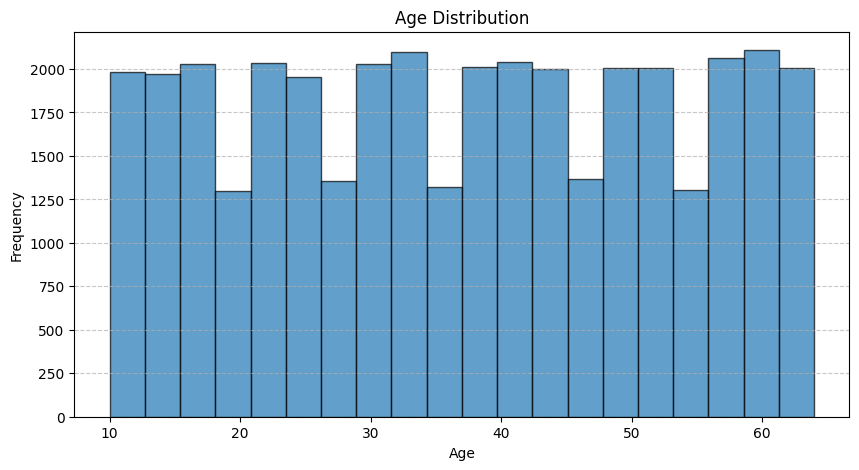

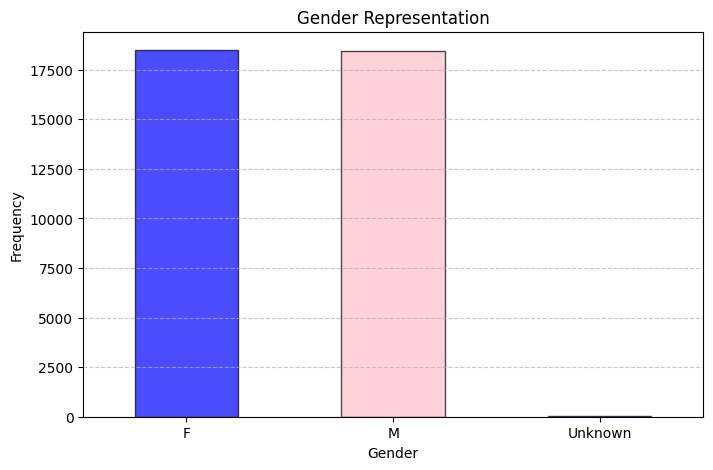

(count    36992.000000
 mean        37.118161
 std         15.867412
 min         10.000000
 25%         23.000000
 50%         37.000000
 75%         51.000000
 max         64.000000
 Name: age, dtype: float64,
 {'F': 18490, 'M': 18443, 'Unknown': 59})

In [43]:
# check bias on age and gender

# # Check age distribution
# plt.figure(figsize=(10, 5))
# plt.hist(train_data['age'], bins=20, edgecolor='black', alpha=0.7)
# plt.title('Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

# Check gender distribution
gender_counts = train_data['gender'].value_counts()
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['blue', 'pink'], edgecolor='black', alpha=0.7)
plt.title('Gender Representation')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Provide numerical breakdown
# age_summary = train_data['age'].describe()
gender_summary = gender_counts.to_dict()

# age_summary,
gender_summary


In [8]:


def analyze_non_numeric_distributions(df):
    """
    Analyzes and plots distributions of non-numerical features
    :param df: DataFrame
    """
    numerical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

    plt.figure(figsize=(15, len(numerical_cols)*4))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(len(numerical_cols), 2, i*2-1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')

        plt.subplot(len(numerical_cols), 2, i*2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


In [5]:

# excluded_columns = ['customer_id','security_no','last_visit_time','feedback']
# non_numerical_cols = train_data.select_dtypes(exclude=['int64', 'float64']).columns
# filtered_columns = [col for col in non_numerical_cols if col not in excluded_columns]
# filtered_data = train_data[filtered_columns]

In [9]:
def analyze_non_numeric_distributions(df):
    """
    Analyzes and plots distributions of non-numerical features

    Parameters:
    df (pandas.DataFrame): Input DataFrame
    """
    # Select non-numeric columns (categorical)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    if len(categorical_cols) == 0:
        print("No categorical columns found in the dataset.")
        return

    # Create subplots for each categorical column
    plt.figure(figsize=(15, 5*len(categorical_cols)))

    for i, col in enumerate(categorical_cols, 1):
        # Get value counts and calculate percentages
        value_counts = df[col].value_counts()
        value_percentages = df[col].value_counts(normalize=True) * 100

        # Create subplot for bar plot
        plt.subplot(len(categorical_cols), 2, i*2-1)
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Count')

        # Add percentage labels on top of bars - CORRECTED THIS PART
        for idx, (j, v) in enumerate(zip(value_counts.index, value_counts.values)):
            plt.text(idx, v, f'{value_percentages.iloc[idx]:.1f}%',
                    ha='center', va='bottom')

        # Create subplot for pie chart
        plt.subplot(len(categorical_cols), 2, i*2)
        plt.pie(value_counts.values, labels=value_counts.index,
                autopct='%1.1f%%', startangle=90)
        plt.title(f'Percentage Distribution of {col}')

        # Print summary statistics
        print(f"\nSummary for {col}:")
        print("-" * 50)
        print(f"Number of unique values: {df[col].nunique()}")
        print(f"Most common value: {df[col].mode().iloc[0]} ({value_percentages.iloc[0]:.1f}%)")
        print(f"Missing values: {df[col].isnull().sum()} ({(df[col].isnull().sum()/len(df))*100:.1f}%)")
        print("\nValue Counts:")
        print(pd.DataFrame({
            'Count': value_counts,
            'Percentage': value_percentages
        }))

    plt.tight_layout()
    plt.show()

    # Additional analysis for high-cardinality categorical variables
    high_cardinality_cols = [col for col in categorical_cols
                            if df[col].nunique() > 10]
    if high_cardinality_cols:
        print("\nHigh Cardinality Columns Analysis:")
        print("-" * 50)
        for col in high_cardinality_cols:
            print(f"\n{col}:")
            print(f"Number of unique values: {df[col].nunique()}")
            print("Top 10 most frequent values:")
            print(df[col].value_counts().head(10))



def check_cardinality(df):
    """
    Checks cardinality of categorical columns
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    cardinality = pd.DataFrame({
        'nunique': df[categorical_cols].nunique(),
        'percent_unique': df[categorical_cols].nunique() / len(df) * 100
    }).sort_values('nunique', ascending=False)

    return cardinality



# def analyze_categorical_relationships(df, target_col):
#     """
#     Analyzes relationships between categorical variables and target
#     """
#     categorical_cols = df.select_dtypes(include=['object', 'category']).columns
#     categorical_cols = [col for col in categorical_cols if col != target_col]

#     for col in categorical_cols:
#         plt.figure(figsize=(10, 6))
#         pd.crosstab(df[col], df[target_col], normalize='index').plot(kind='bar')
#         plt.title(f'{col} vs {target_col}')
#         plt.xlabel(col)
#         plt.ylabel(f'Proportion of {target_col}')
#         plt.xticks(rotation=45)
#         plt.tight_layout()
#         plt.show()

def analyze_categorical_relationships(df, target_col):
    """
    Analyzes relationships between categorical variables and target using subplots

    Parameters:
    df (pandas.DataFrame): Input DataFrame
    target_col (str): Name of the target column
    """
    # Get categorical columns excluding target
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    categorical_cols = [col for col in categorical_cols if col != target_col]

    if len(categorical_cols) == 0:
        print("No categorical columns found in the dataset.")
        return

    # Calculate number of rows and columns for subplots
    n_cols = 2  # You can adjust this
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

    # Create figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols,
                            figsize=(15, 5*n_rows),
                            squeeze=False)

    # Flatten axes array for easier iteration
    axes_flat = axes.flatten()

    # Create plots
    for idx, col in enumerate(categorical_cols):
        # Create crosstab
        ct = pd.crosstab(df[col], df[target_col], normalize='index')

        # Plot on corresponding subplot
        ct.plot(kind='bar', ax=axes_flat[idx])

        # Customize subplot
        axes_flat[idx].set_title(f'{col} vs {target_col}')
        axes_flat[idx].set_xlabel(col)
        axes_flat[idx].set_ylabel(f'Proportion of {target_col}')
        axes_flat[idx].tick_params(axis='x', rotation=45)

        # Add percentage labels
        for container in axes_flat[idx].containers:
            axes_flat[idx].bar_label(container, fmt='%.1f%%',
                                   padding=3)

        # Print chi-square test results
        chi2, p_value = chi2_contingency(pd.crosstab(df[col], df[target_col]))[:2]
        print(f"\nChi-square test results for {col}:")
        print(f"Chi-square statistic: {chi2:.2f}")
        print(f"p-value: {p_value:.4f}")

    # Remove empty subplots if any
    for idx in range(len(categorical_cols), len(axes_flat)):
        fig.delaxes(axes_flat[idx])

    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Print additional statistics
    print("\nDetailed Statistics:")
    print("-" * 50)
    for col in categorical_cols:
        print(f"\n{col} breakdown:")
        print(pd.crosstab(df[col], df[target_col],
                         normalize='index').round(3) * 100)

In [13]:
excluded_columns = ['customer_id','security_no', 'Name','joining_date','referral_id','last_visit_time','avg_frequency_login_days']
filtered_columns = [col for col in train_data if col not in excluded_columns]
filtered_data = train_data[filtered_columns]

In [14]:
check_cardinality(filtered_data)

,nunique,percent_unique
feedback,9,0.024330
membership_category,6,0.016220
complaint_status,5,0.013516
medium_of_operation,4,0.010813
gender,3,0.008110
region_category,3,0.008110
joined_through_referral,3,0.008110
preferred_offer_types,3,0.008110
internet_option,3,0.008110
used_special_discount,2,0.005407



Chi-square test results for gender:
Chi-square statistic: 8.00
p-value: 0.6284

Chi-square test results for region_category:
Chi-square statistic: 97.49
p-value: 0.0000

Chi-square test results for membership_category:
Chi-square statistic: 31501.94
p-value: 0.0000

Chi-square test results for joined_through_referral:
Chi-square statistic: 171.17
p-value: 0.0000

Chi-square test results for preferred_offer_types:
Chi-square statistic: 318.94
p-value: 0.0000

Chi-square test results for medium_of_operation:
Chi-square statistic: 94.65
p-value: 0.0000

Chi-square test results for internet_option:
Chi-square statistic: 9.25
p-value: 0.5086

Chi-square test results for used_special_discount:
Chi-square statistic: 6.55
p-value: 0.2564

Chi-square test results for offer_application_preference:
Chi-square statistic: 97.28
p-value: 0.0000

Chi-square test results for past_complaint:
Chi-square statistic: 9.12
p-value: 0.1044

Chi-square test results for complaint_status:
Chi-square statistic:

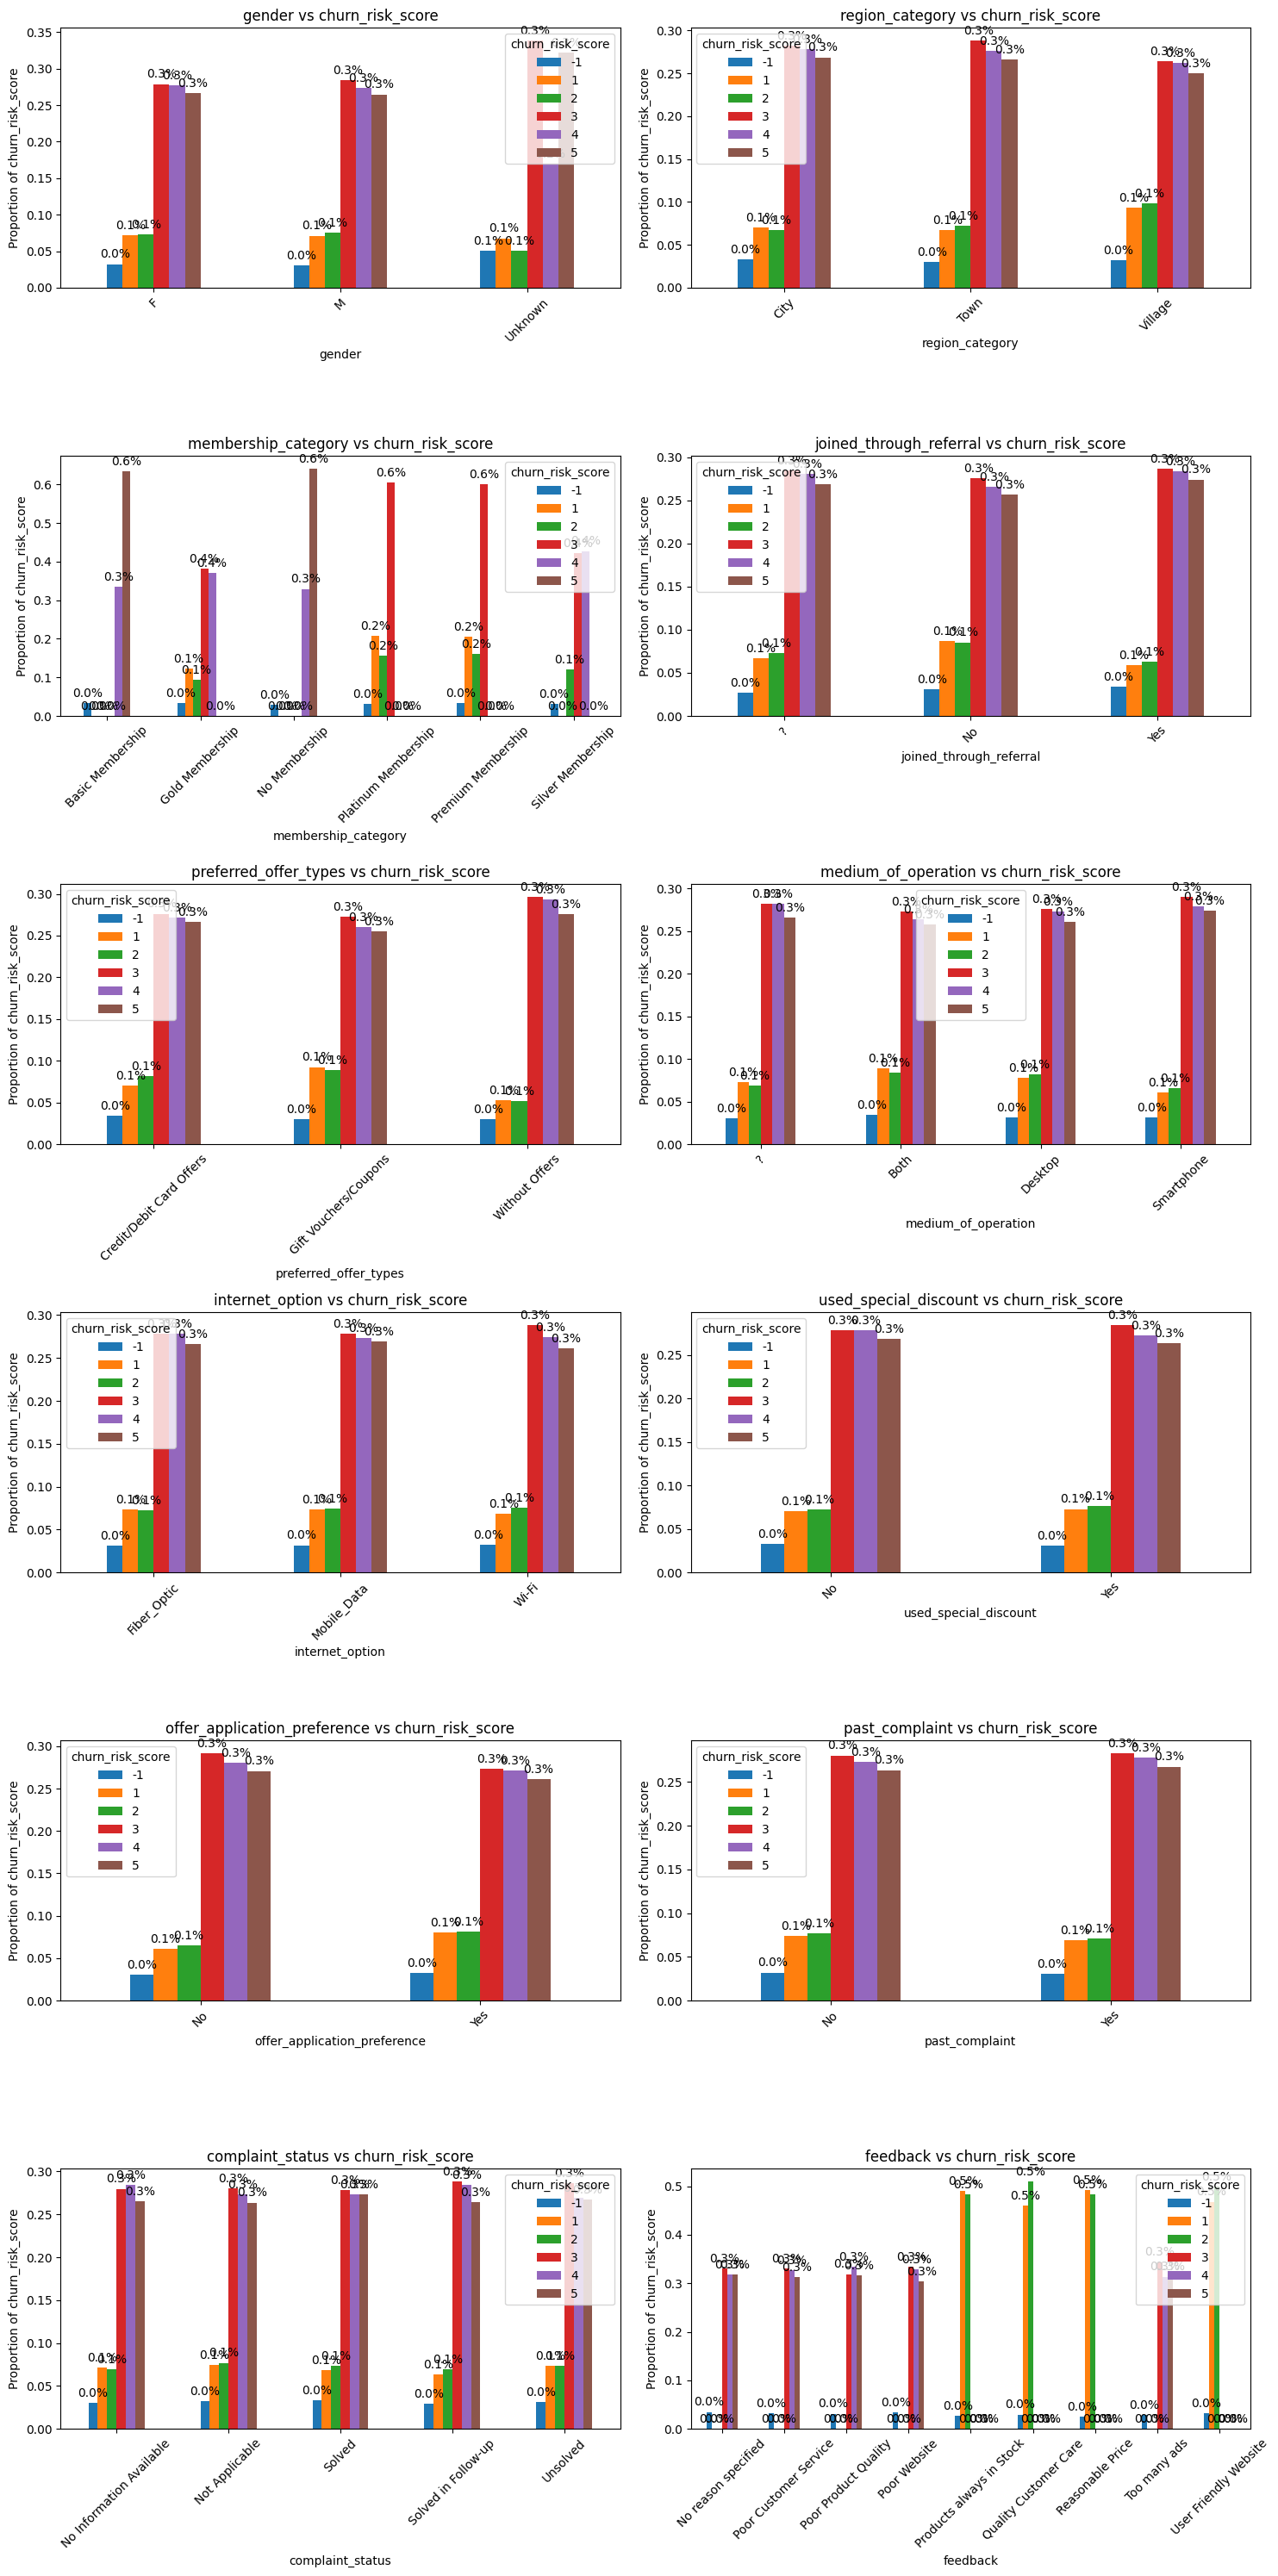


Detailed Statistics:
--------------------------------------------------

gender breakdown:
churn_risk_score   -1    1    2     3     4     5
gender                                           
F                 3.2  7.2  7.3  27.9  27.7  26.6
M                 3.0  7.1  7.5  28.4  27.4  26.5
Unknown           5.1  6.8  5.1  33.9  16.9  32.2

region_category breakdown:
churn_risk_score   -1    1    2     3     4     5
region_category                                  
City              3.3  7.0  6.8  28.2  27.8  26.9
Town              3.0  6.7  7.2  28.9  27.6  26.6
Village           3.2  9.3  9.8  26.5  26.2  25.0

membership_category breakdown:
churn_risk_score      -1     1     2     3     4     5
membership_category                                   
Basic Membership     3.2   0.0   0.0   0.0  33.4  63.3
Gold Membership      3.3  12.3   9.3  38.1  37.0   0.0
No Membership        2.9   0.0   0.0   0.0  32.9  64.1
Platinum Membership  3.1  20.7  15.6  60.6   0.0   0.0
Premium Membership

In [15]:
analyze_categorical_relationships(filtered_data, 'churn_risk_score')


Summary for gender:
--------------------------------------------------
Number of unique values: 3
Most common value: F (50.0%)
Missing values: 0 (0.0%)

Value Counts:
         Count  Percentage
gender                    
F        18490   49.983780
M        18443   49.856726
Unknown     59    0.159494

Summary for region_category:
--------------------------------------------------
Number of unique values: 3
Most common value: Town (44.8%)
Missing values: 5428 (14.7%)

Value Counts:
                 Count  Percentage
region_category                   
Town             14128   44.759853
City             12737   40.352934
Village           4699   14.887213

Summary for membership_category:
--------------------------------------------------
Number of unique values: 6
Most common value: Basic Membership (20.9%)
Missing values: 0 (0.0%)

Value Counts:
                     Count  Percentage
membership_category                   
Basic Membership      7724   20.880190
No Membership         769

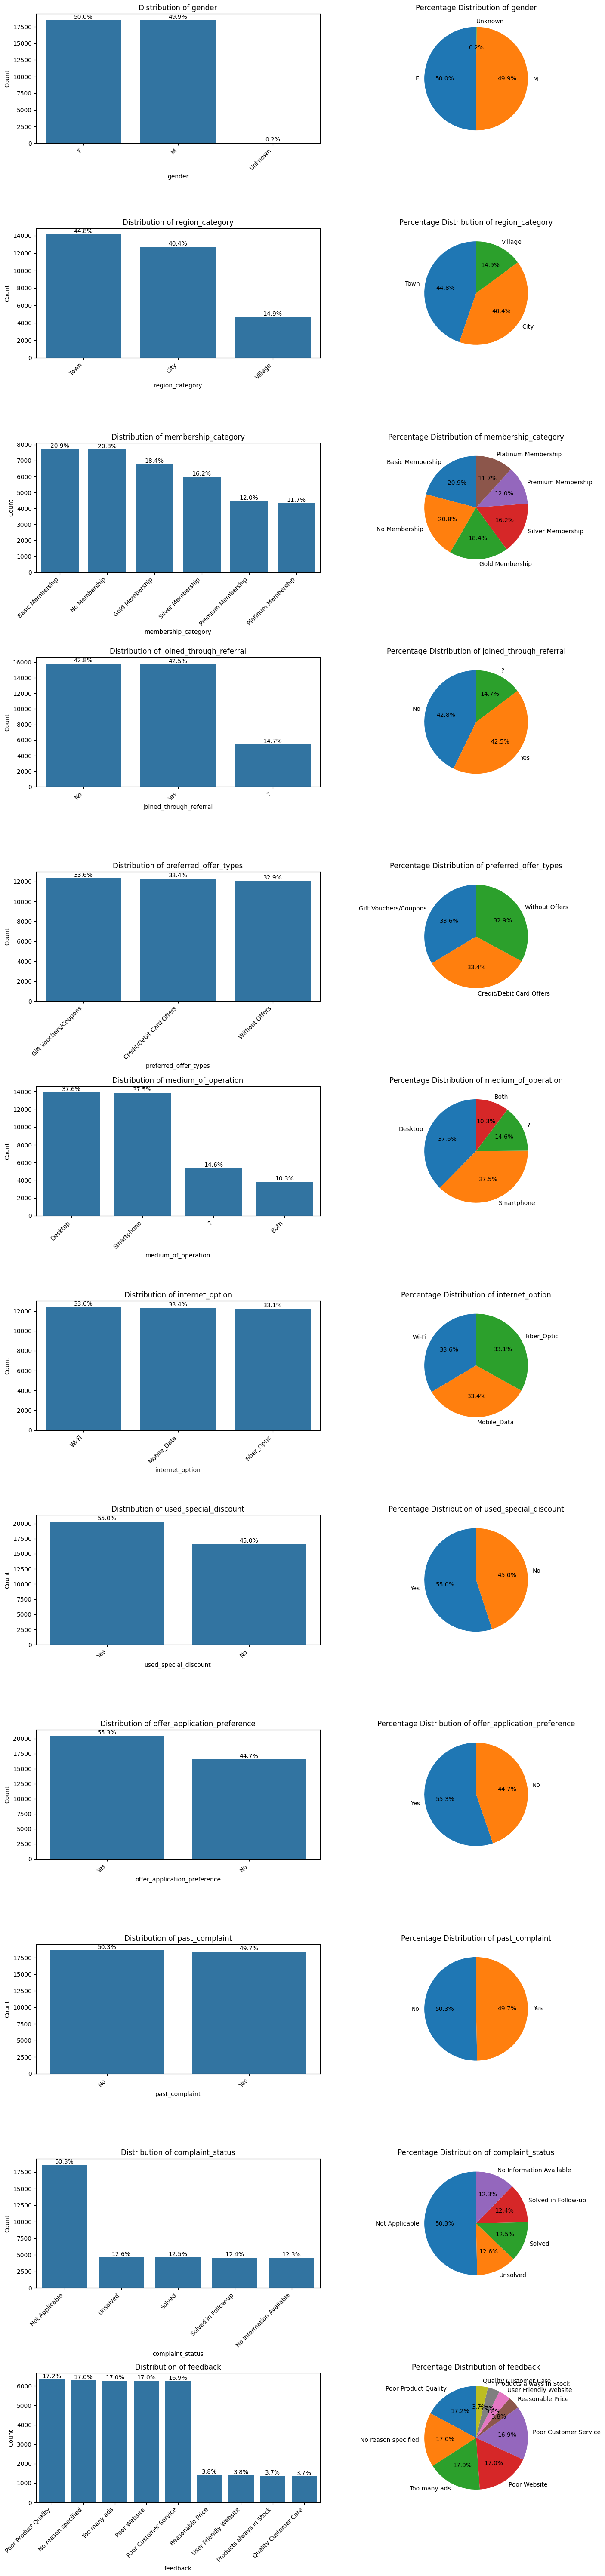

In [16]:
analyze_non_numeric_distributions(filtered_data)

# **Observations**

1. Data Quality:
- Class Imbalance: Churn risk scores (1-5) are imbalanced, with higher concentrations in scores 3-5. This suggests need for balancing techniques in modeling
- Missing/Null Values: Appears minimal as distributions are clean
Complaint status and feedback categories show complete data

- Categorical Variables Distribution:

  - Gender: Fairly balanced binary distribution
  - Region: Three categories with uneven distribution
  - Membership: Six categories with varying distributions
  - Internet options: Three fairly balanced categories
  - Medium of operation: Four categories with uneven distribution

2. Feature Engineering Decisions:
   - Engagement Score
   - Complaint Ratio
   - Membership Value
   

3. Preprocessing Decisions:
   - Categorical Encoding:

# 4. Feature Engineering

In [4]:

def engineer_features(df):
    """
    Creates new features based on existing data
    :param df: DataFrame
    :return: DataFrame with new features
    """
    df_new = df.copy()

    # Engagement Score
    if 'avg_time_spent' in df.columns and 'points_in_wallet' in df.columns:
        df_new['engagement_score'] = df_new['avg_time_spent'] * df_new['points_in_wallet']

    # Complaint Ratio
    if 'past_complaint' in df.columns and 'complaint_status' in df.columns:
        df_new['complaint_resolution_rate'] = (
            df_new['complaint_status'].map({'Resolved': 1, 'Not Resolved': 0, 'Pending': 0.5})
        )

    # Membership Value
    df_new['membership_value'] = df_new['membership_category'].map({
        'Basic Membership': 1,
        'Silver Membership': 2,
        'Gold Membership': 3,
        'Platinum Membership': 4,
        'Premium Membership': 5,
        'No Membership': 0
    })

    # Activity Level
    if 'days_since_last_login' in df.columns:
        df_new['activity_level'] = pd.cut(
            df_new['days_since_last_login'],
            bins=[-float('inf'), 7, 30, 90, float('inf')],
            labels=['Very Active', 'Active', 'Moderate', 'Inactive']
        )

    return df_new


# Apply feature engineering
train_data_processed = engineer_features(train_data)
test_data_processed = engineer_features(test_data)



# 5. Data Preprocessing
* Handles missing values
* Scales numerical features
* Encodes categorical variables

In [7]:
def preprocess_data(df, is_training=True, fitted_transformers=None, target_col='churn_risk_score'):
    """
    Comprehensive preprocessing pipeline including:
    - Missing value handling
    - Feature engineering
    - Categorical encoding
    - Numerical scaling

    Parameters:
    df (pandas.DataFrame): Input DataFrame
    is_training (bool): Whether this is training data (True) or test/prediction data (False)
    fitted_transformers (dict): Dictionary of fitted transformers from training data
    target_col (str): Name of target column to exclude from preprocessing

    Returns:
    tuple: (preprocessed DataFrame, fitted_transformers_dict)
    """
    # Separate target variable if it exists in the DataFrame
    if target_col in df.columns:
        target = df[target_col].copy()
        df_processed = df.drop(columns=[target_col]).copy()
    else:
        df_processed = df.copy()

    if fitted_transformers is None:
        fitted_transformers = {}

    # 1. Handle missing values
    numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df_processed.select_dtypes(include=['object', 'category']).columns

    # Fill numerical missing values with median
    for col in numerical_cols:
        if df_processed[col].isnull().any():
            if is_training:
                fitted_transformers[f'{col}_median'] = df_processed[col].median()
            df_processed[col] = df_processed[col].fillna(fitted_transformers.get(f'{col}_median', 0))

    # Fill categorical missing values with mode
    for col in categorical_cols:
        if df_processed[col].isnull().any():
            if is_training:
                fitted_transformers[f'{col}_mode'] = df_processed[col].mode()[0]
            df_processed[col] = df_processed[col].fillna(fitted_transformers.get(f'{col}_mode', 'Unknown'))

    # 2. Feature Engineering
    # Engagement Score
    if all(col in df_processed.columns for col in ['avg_time_spent', 'points_in_wallet']):
        df_processed['engagement_score'] = df_processed['avg_time_spent'] * df_processed['points_in_wallet']

    # Activity Level based on last login
    if 'days_since_last_login' in df_processed.columns:
        df_processed['activity_level'] = pd.cut(
            df_processed['days_since_last_login'],
            bins=[-float('inf'), 7, 30, 90, float('inf')],
            labels=['Very Active', 'Active', 'Moderate', 'Inactive']
        )

    # 3. Categorical Encoding
    # Ordinal encoding for ordered categories
    ordinal_features = {
        'membership_category': ['No Membership', 'Basic Membership', 'Silver Membership',
                              'Gold Membership', 'Platinum Membership', 'Premium Membership'],
        'complaint_status': ['Not Applicable', 'Pending', 'Not Resolved', 'Resolved'],
        'activity_level': ['Very Active', 'Active', 'Moderate', 'Inactive']
    }

    # Apply ordinal encoding
    for feature, ordering in ordinal_features.items():
        if feature in df_processed.columns:
            df_processed[feature] = pd.Categorical(df_processed[feature],
                                                 categories=ordering,
                                                 ordered=True)
            df_processed[feature] = df_processed[feature].cat.codes

    # One-hot encoding for nominal categories
    nominal_features = ['gender', 'region_category', 'joined_through_referral',
                       'preferred_offer_types', 'medium_of_operation', 'internet_option']

    # Keep only nominal features that exist in the dataset
    nominal_features = [f for f in nominal_features if f in df_processed.columns]

    # One-hot encode nominal features
    if nominal_features:
        dummy_df = pd.get_dummies(df_processed[nominal_features], drop_first=True)

        if is_training:
            fitted_transformers['dummy_columns'] = dummy_df.columns.tolist()
        else:
            # Add missing columns if any
            for col in fitted_transformers.get('dummy_columns', []):
                if col not in dummy_df.columns:
                    dummy_df[col] = 0
            # Ensure columns are in the same order
            dummy_df = dummy_df.reindex(columns=fitted_transformers['dummy_columns'], fill_value=0)

        df_processed = pd.concat([df_processed.drop(nominal_features, axis=1), dummy_df], axis=1)

    # 4. Scale numerical features
    # Update numerical columns after feature engineering
    numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns

    if is_training:
        # Fit scaler on training data
        scaler = StandardScaler()
        fitted_transformers['scaler'] = scaler.fit(df_processed[numerical_cols])

    # Transform the data using fitted scaler
    if 'scaler' in fitted_transformers:
        df_processed[numerical_cols] = fitted_transformers['scaler'].transform(df_processed[numerical_cols])

    # Add back target variable if it existed
    if target_col in df.columns:
        df_processed[target_col] = target

    return df_processed, fitted_transformers

# Example usage:
# For training data:
train_processed, fitted_transformers = preprocess_data(train_data, is_training=True)

# For test/validation data (using same transformations):
test_processed, _ = preprocess_data(test_data, is_training=False, fitted_transformers=fitted_transformers)

# Print summary of preprocessing
print("\nPreprocessing Summary:")
print(f"Original train shape: {train_data.shape}")
print(f"Processed train shape: {train_processed.shape}")
print(f"Original test shape: {test_data.shape}")
print(f"Processed test shape: {test_processed.shape}")

# Print feature names to verify
print("\nFeatures after preprocessing:")
print(train_processed.columns.tolist())


Preprocessing Summary:
Original train shape: (36992, 25)
Processed train shape: (36992, 34)
Original test shape: (19919, 24)
Processed test shape: (19919, 33)

Features after preprocessing:
['customer_id', 'Name', 'age', 'security_no', 'membership_category', 'joining_date', 'referral_id', 'last_visit_time', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback', 'engagement_score', 'activity_level', 'gender_M', 'gender_Unknown', 'region_category_Town', 'region_category_Village', 'joined_through_referral_No', 'joined_through_referral_Yes', 'preferred_offer_types_Gift Vouchers/Coupons', 'preferred_offer_types_Without Offers', 'medium_of_operation_Both', 'medium_of_operation_Desktop', 'medium_of_operation_Smartphone', 'internet_option_Mobile_Data', 'internet_option_Wi-Fi', 'churn_risk_score']


# 6. Save Processed Data
# Save the processed datasets

In [10]:

train_processed.to_csv('processed_train.csv', index=False)
test_processed.to_csv('processed_test.csv', index=False)



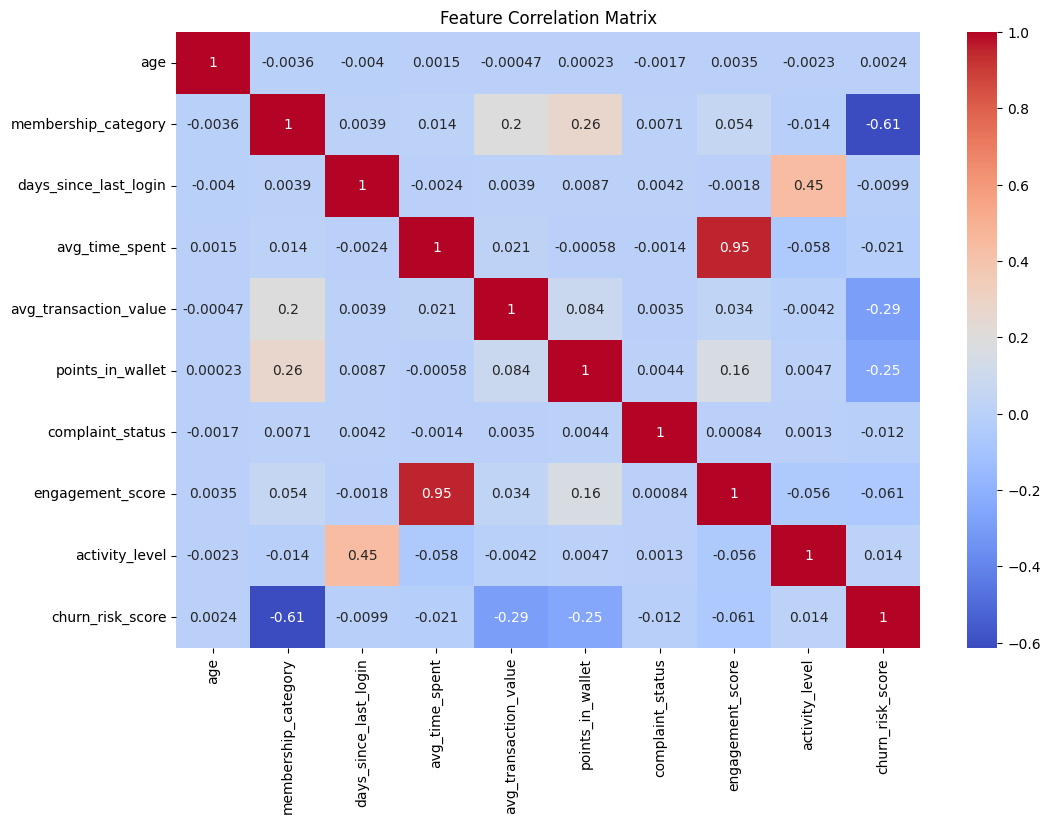

In [12]:
# 7. Correlation Analysis
plt.figure(figsize=(12, 8))

# Select only numerical features for correlation analysis
numerical_features = train_processed.select_dtypes(include=['number']).columns
sns.heatmap(train_processed[numerical_features].corr(), annot=True, cmap='coolwarm')


plt.title('Feature Correlation Matrix')
plt.show()




## Final Notes and Observations:

1. Data Quality:
- Class Imbalance: Churn risk scores (1-5) are imbalanced, with higher concentrations in scores 3-5. This suggests need for balancing techniques in modeling
- Missing/Null Values: Appears minimal as distributions are clean
Complaint status and feedback categories show complete data

- Categorical Variables Distribution:

  - Gender: Fairly balanced binary distribution
  - Region: Three categories with uneven distribution
  - Membership: Six categories with varying distributions
  - Internet options: Three fairly balanced categories
  - Medium of operation: Four categories with uneven distribution

2. Feature Engineering Decisions:
   - Engagement Score
   - Complaint Ratio
   - Membership Value
   

3. Preprocessing Decisions:
   - Categorical Encoding:


4. Next Steps:
   - Model Preparation:
    - Additional Analysis Needed:
    - Correlation analysis between numerical features
    - Feature importance analysis
    - Interaction effects between features
    - Time-based patterns in customer behavior


  - Model Considerations:
    - Use models that handle class imbalance well (XGBoost, LightGBM)
    - Implement cross-validation with stratification
    - Consider ensemble methods
    - Focus on metrics like weighted F1-score or balanced accuracy
   